---
# Sklearn load_iris dataset
---
Dataset based on the statistican R.A Fisher's iris classification study.
- Target : setosa, versicolor, virginica
- Feature :
    - Sepal Length
    - Sepal Width
    - Petal Length
    - Petal Width

## Prepare for Training

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-whitegrid')

### sklearn.load_iris()

In [2]:
iris = sklearn.datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
print(f'Dataset Shape : {iris.data.shape}')
print(f'Dataset Target : {iris.target_names}')
print(f'Dataset Target Number : {len(iris.target_names)}')

Dataset Shape : (150, 4)
Dataset Target : ['setosa' 'versicolor' 'virginica']
Dataset Target Number : 3


### Preprocessing

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
label = pd.Series(iris.target, dtype = "category")

#pd.Series.cat = pd.Categorical
label= label.cat.rename_categories(iris.target_names)
df['species'] = label
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### EDA

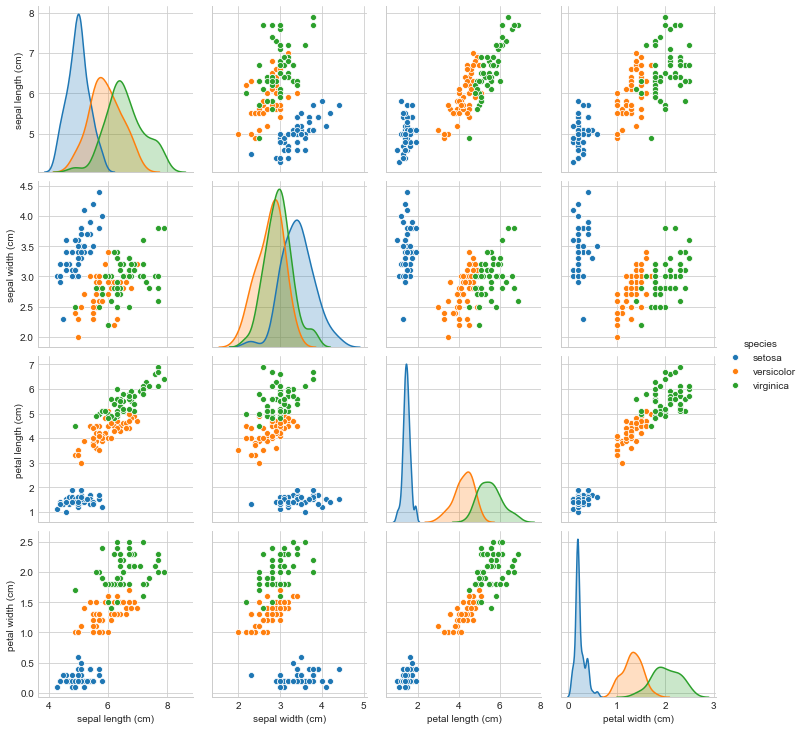

In [5]:
sns.pairplot(df, hue = "species")

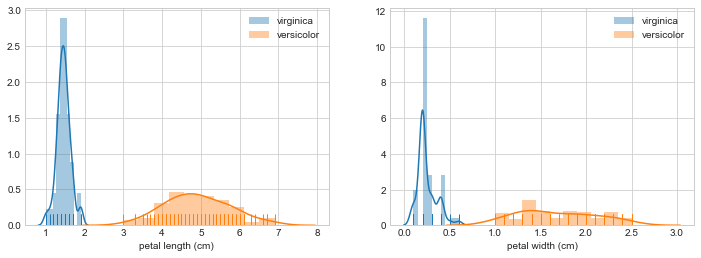

setosa can be classified well only with petal length and petal width features


In [6]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.distplot(df[df.species == "setosa"]["petal length (cm)"], 
             bins = 10, hist=True, rug=True, label="virginica", ax = ax[0])
sns.distplot(df[df.species != "setosa"]["petal length (cm)"],
             bins = 10, hist=True, rug=True, label="versicolor", ax = ax[0])
sns.distplot(df[df.species == "setosa"]["petal width (cm)"], 
             bins = 10, hist=True, rug=True, label="virginica", ax = ax[1])
sns.distplot(df[df.species != "setosa"]["petal width (cm)"],
             bins = 10, hist=True, rug=True, label="versicolor", ax = ax[1])
ax[0].legend()
ax[1].legend()
plt.show()
print("setosa can be classified well only with petal length and petal width features")

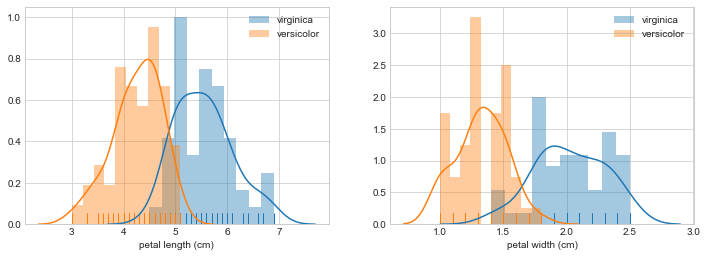

In [7]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.distplot(df[df.species == "virginica"]["petal length (cm)"], 
             bins = 10, hist=True, rug=True, label="virginica", ax = ax[0])
sns.distplot(df[df.species == "versicolor"]["petal length (cm)"],
             bins = 10, hist=True, rug=True, label="versicolor", ax = ax[0])
sns.distplot(df[df.species == "virginica"]["petal width (cm)"], 
             bins = 10, hist=True, rug=True, label="virginica", ax = ax[1])
sns.distplot(df[df.species == "versicolor"]["petal width (cm)"],
             bins = 10, hist=True, rug=True, label="versicolor", ax = ax[1])
ax[0].legend()
ax[1].legend()
plt.show()

### train_test_split

In [8]:
from sklearn.model_selection import train_test_split

X = iris.data
Y = iris.target

# stratify : let train/test data target to have same ratio with input dataset target
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify=Y)

In [9]:
print(f'Train Data Shape : {x_train.shape}')

Train Data Shape : (120, 4)


## Neural Network by PyTorch

In [10]:
import torch
import torch.nn as nn
import torch.optim

### Neural Network Design

In [29]:
in_features = x_train.shape[1]
n_data = x_train.shape[0]
n_hidden = 10
n_target = len(iris.target_names)

# Two hidden layer network
net = nn.Sequential(nn.Linear(in_features=in_features, out_features=n_hidden),
                    nn.Tanh(),
                    nn.Linear(in_features=n_hidden, out_features=n_target),
                    nn.LogSoftmax(dim=1) # LogSoftmax() + NLLLoss() = CrossEntropyLoss()
                    )
net

Sequential(
  (0): Linear(in_features=4, out_features=10, bias=True)
  (1): Tanh()
  (2): Linear(in_features=10, out_features=3, bias=True)
  (3): LogSoftmax()
)

In [30]:
# data for training
xtrain, ytrain = torch.tensor(x_train).float(), torch.tensor(y_train).long()
xval, yval = torch.tensor(x_val).float(), torch.tensor(y_val).long()

print(f'xtrain dtype & shape : {xtrain.dtype, xtrain.shape}')
print(f'ytrain dtype & shape : {ytrain.dtype, ytrain.shape}')

xtrain dtype & shape : (torch.float32, torch.Size([120, 4]))
ytrain dtype & shape : (torch.int64, torch.Size([120]))


In [31]:
# net working test
with torch.no_grad():
    prediction = net(xtrain[:5])
    
indx_pred = torch.argmax(prediction, dim=1)

print ('target names: ', iris.target_names)
for i in range(prediction.shape[0]):
    print ('prediction: ', prediction[i], 'argmax: ', indx_pred[i], ' predicted: ', iris.target_names[indx_pred[i]])

target names:  ['setosa' 'versicolor' 'virginica']
prediction:  tensor([-0.9892, -1.2036, -1.1148]) argmax:  tensor(0)  predicted:  setosa
prediction:  tensor([-0.9844, -1.2115, -1.1130]) argmax:  tensor(0)  predicted:  setosa
prediction:  tensor([-0.9979, -1.1843, -1.1228]) argmax:  tensor(0)  predicted:  setosa
prediction:  tensor([-0.9772, -1.2012, -1.1306]) argmax:  tensor(0)  predicted:  setosa
prediction:  tensor([-0.9400, -1.2589, -1.1227]) argmax:  tensor(0)  predicted:  setosa


### Optimizer & Loss Function

- `LogSoftMax()` + `NLLLoss()` = simply choose the one based on the target label and update it only.
- This is equal to `CrossEntropyLoss()`

In [32]:
optimizer = torch.optim.Adam(net.parameters(), lr=1e-5)
loss_fn = nn.NLLLoss()

### Training Loop

In [33]:
def accuracy(pred, target, txt):
    comp = torch.argmax(pred, dim = 1)  == target
    ncorrect = comp.sum()
    acc = ncorrect / float(len(pred))
#     if txt is not None:
#         print(f'{txt}: {comp}, {ncorrect}, {target}, {acc}')
    return acc

def training_loop(n_epochs, optim, model, loss_fn, xtrain, ytrain, xval, yval):
    tloss, tacc, vloss, vacc = [], [], [], []
    for epoch in range(1, n_epochs+1):
        ypred = model(xtrain)
        loss_train = loss_fn(ypred, ytrain)
        
        optim.zero_grad()
        loss_train.backward()
        optim.step()
        
        with torch.no_grad():
            yval_pred = model(xval)
            loss_val = loss_fn(yval_pred, yval)

        # accuracy computation
        with torch.no_grad():
            acc_t = accuracy(ypred, ytrain, 'train')
            acc_v = accuracy(yval_pred, yval, 'validation')
        
        if epoch == 1 or epoch % 2000 == 0:
            print(f'Epoch {epoch:5d}, tloss {loss_train:.2f} t_acc: {acc_t:.2f}  vloss {loss_val:.2f}  v_acc: {acc_v:.2f}')
            
        # record for history return
        tloss.append(loss_train.item())
        vloss.append(loss_val.item())
        tacc.append(acc_t.item())
        vacc.append(acc_v.item())
        
    print ('finished.')
    return {'tloss': tloss, 'tacc': tacc, 'vloss': vloss, 'vacc': vacc}

In [34]:
history = training_loop(n_epochs = 30000,
                        optim = optimizer,
                        model = net,
                        loss_fn = loss_fn,
                        xtrain = xtrain, ytrain = ytrain,
                        xval = xval, yval = yval)

Epoch     1, tloss 1.13 t_acc: 0.00  vloss 1.13  v_acc: 0.00
Epoch  2000, tloss 1.09 t_acc: 0.00  vloss 1.09  v_acc: 0.00
Epoch  4000, tloss 1.06 t_acc: 0.00  vloss 1.06  v_acc: 0.00
Epoch  6000, tloss 1.01 t_acc: 0.00  vloss 1.01  v_acc: 0.00
Epoch  8000, tloss 0.95 t_acc: 0.00  vloss 0.95  v_acc: 0.00
Epoch 10000, tloss 0.88 t_acc: 0.00  vloss 0.88  v_acc: 0.00
Epoch 12000, tloss 0.81 t_acc: 0.00  vloss 0.81  v_acc: 0.00
Epoch 14000, tloss 0.75 t_acc: 0.00  vloss 0.74  v_acc: 0.00
Epoch 16000, tloss 0.68 t_acc: 0.00  vloss 0.68  v_acc: 0.00
Epoch 18000, tloss 0.62 t_acc: 0.00  vloss 0.62  v_acc: 0.00
Epoch 20000, tloss 0.57 t_acc: 0.00  vloss 0.56  v_acc: 0.00
Epoch 22000, tloss 0.52 t_acc: 0.00  vloss 0.51  v_acc: 1.00
Epoch 24000, tloss 0.48 t_acc: 0.00  vloss 0.47  v_acc: 1.00
Epoch 26000, tloss 0.45 t_acc: 0.00  vloss 0.44  v_acc: 1.00
Epoch 28000, tloss 0.41 t_acc: 0.00  vloss 0.40  v_acc: 1.00
Epoch 30000, tloss 0.38 t_acc: 0.00  vloss 0.37  v_acc: 1.00
finished.


In [36]:
yt = torch.argmax(net(xtrain), dim=1)
yt

tensor([0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 2,
        2, 1, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2,
        1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1,
        0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0,
        1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2])

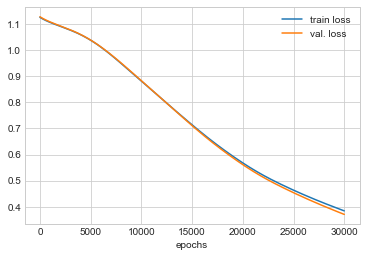

In [37]:
plt.plot(history['tloss'], label='train loss')
plt.plot(history['vloss'], label='val. loss')
plt.xlabel('epochs')
plt.legend()

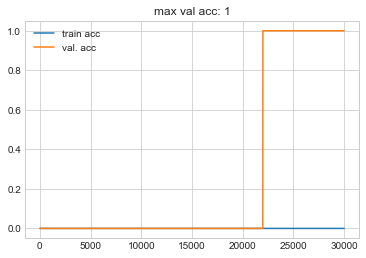

In [38]:
plt.plot(history['tacc'], label='train acc')
plt.plot(history['vacc'], label='val. acc')
mvacc = max(history['vacc'])
plt.title(f'max val acc: {mvacc}')
plt.legend()

In [ ]:
## going to add other ML training results